## Gaussian distribution

Defined from a mean $\mu$ and a covariance matrix $C$,
$$ p(x) = \frac{1}{\sqrt{(2\pi)^{d} \det(C)}} \exp\left( -\frac{1}{2} (x - \mu)^\mathsf{T} C^{-1} (x - \mu) \right) . $$
Because the covariance matrix is symmetric positive definite, this can also be written using the square-root of the covariance, $\Sigma := C^{1/2}$ or $C = \Sigma^\mathsf{T} \Sigma$, with
$$ p(x) = \frac{1}{(2\pi)^{d/2} \det(\Sigma)} \exp\left( -\frac{1}{2} \bigl\| \Sigma^{-1}(x - \mu) \bigr\|^2 \right) $$
with the Euclidean norm $\|u\|^2 = u^\mathsf{T} u$.

The score function is
$$ s(x) = \nabla_x \log p(x) = -C^{-1} (x - \mu) $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from gaussian import MultivariateNormal

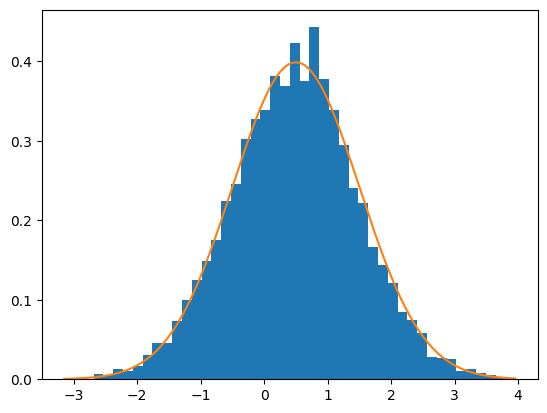

In [3]:
norm = MultivariateNormal(1, mean=0.5)

x_sample = norm.sample(5000)
plt.hist(x_sample, bins='auto', density='true')

x = np.linspace(x_sample.min(), x_sample.max(), 200)[:, None]
y = norm.density(x)

plt.plot(x, y)

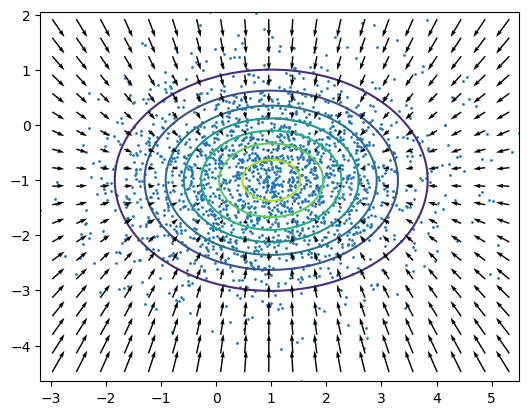

In [4]:
norm = MultivariateNormal(2, [1.0, -1.0], [2.0, 1.0])

x_sample, y_sample = norm.sample(2000).T

x_cont = np.linspace(x_sample.min(), x_sample.max(), 200)
y_cont = np.linspace(y_sample.min(), y_sample.max(), 200)
X, Y = np.meshgrid(x_cont, y_cont)
Z = norm.density(np.stack((X, Y), -1))

x_coarse = x_cont[5::10]
y_coarse = y_cont[5::10]
X_coarse, Y_coarse = np.meshgrid(x_coarse, y_coarse)
XY_coarse = np.stack((X_coarse, Y_coarse), -1)

UV = norm.score(XY_coarse)

fig, ax = plt.subplots()

ax.contour(X, Y, Z, levels=10)

ax.scatter(x_sample, y_sample, s=1)

U, V = UV[:, :, 0], UV[:, :, 1]
ax.quiver(X_coarse, Y_coarse, U, V, zorder=2)
ax.set_aspect("equal")

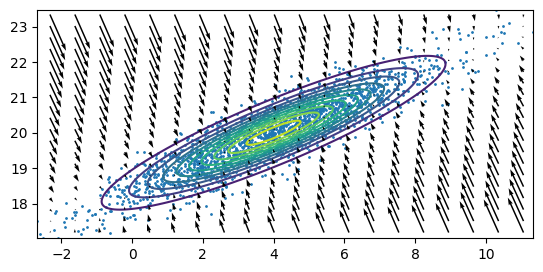

In [5]:
std = np.array([[1.0, 2.0], [0.0, 1.0]])  # cov(x, y) = 2 > 0
norm = MultivariateNormal(2, [4.0, 20.0], std @ std.T)

x_sample, y_sample = norm.sample(2000).T

# x_cont = np.linspace(8.0, 12.0, 200)
# y_cont = np.linspace(-9.0, -6.0, 200)
x_cont = np.linspace(x_sample.min(), x_sample.max(), 200)
y_cont = np.linspace(y_sample.min(), y_sample.max(), 200)
X, Y = np.meshgrid(x_cont, y_cont)
Z = norm.density(np.stack((X, Y), -1))

x_coarse = x_cont[5::10]
y_coarse = y_cont[5::10]
X_coarse, Y_coarse = np.meshgrid(x_coarse, y_coarse)
XY_coarse = np.stack((X_coarse, Y_coarse), -1)

UV = norm.score(XY_coarse)

fig, ax = plt.subplots()

ax.contour(X, Y, Z, levels=10)

ax.scatter(x_sample, y_sample, s=1)

norm_UV = np.sqrt(np.sum(np.square(UV), -1, keepdims=True))
# UV /= norm_UV
U, V = UV[:, :, 0], UV[:, :, 1]
ax.quiver(X_coarse, Y_coarse, U, V, zorder=2)
ax.set_aspect("equal")